In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [3]:
df = pd.read_csv('../data/diabetic_data.csv')

print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
df.head()

Shape of dataset: (101766, 50)

First 5 rows:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
missing = (df == '?').sum()
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_percent
}).sort_values('Missing %', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

                   Missing Count  Missing %
weight                     98569  96.858479
medical_specialty          49949  49.082208
payer_code                 40256  39.557416
race                        2273   2.233555
diag_3                      1423   1.398306
diag_2                       358   0.351787
diag_1                        21   0.020636


Readmission value counts:

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


C:\Users\faiza\AppData\Local\Temp\ipykernel_12536\930186436.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='readmitted', data=df, palette='Set2')


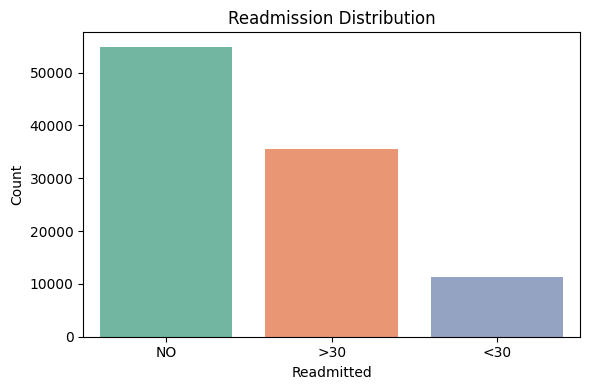

In [5]:
print("Readmission value counts:\n")
print(df['readmitted'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='readmitted', data=df, palette='Set2')
plt.title('Readmission Distribution')
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../outputs/readmission_distribution.png')
plt.show()

C:\Users\faiza\AppData\Local\Temp\ipykernel_12536\3955051445.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='readmitted', y='time_in_hospital', data=df, palette='Set3')


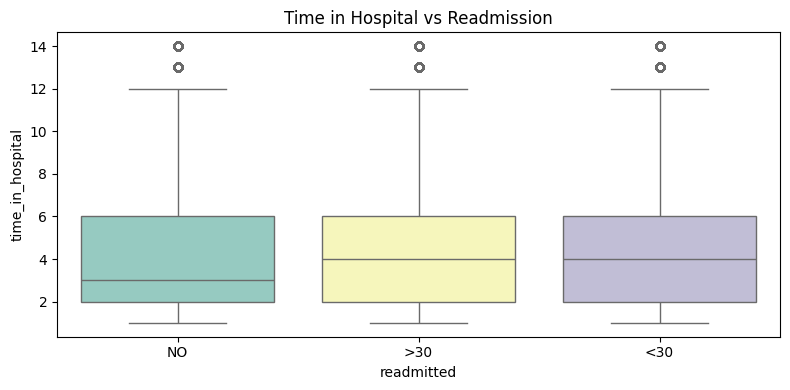

C:\Users\faiza\AppData\Local\Temp\ipykernel_12536\3955051445.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='readmitted', y='num_medications', data=df, palette='Set2')


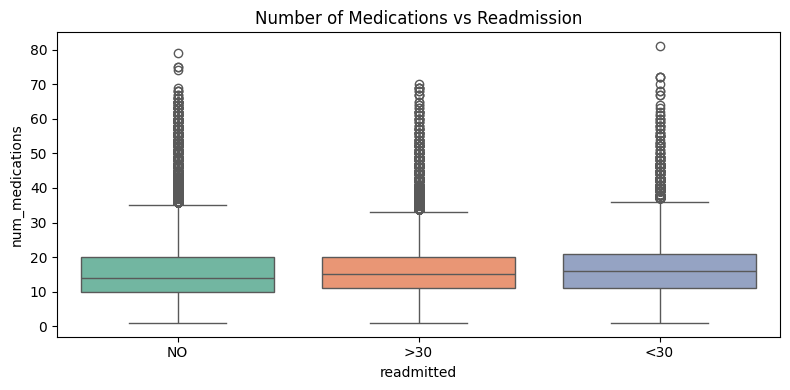

In [6]:
# Time in hospital vs readmission
plt.figure(figsize=(8,4))
sns.boxplot(x='readmitted', y='time_in_hospital', data=df, palette='Set3')
plt.title('Time in Hospital vs Readmission')
plt.tight_layout()
plt.savefig('../outputs/time_in_hospital.png')
plt.show()

# Number of medications vs readmission
plt.figure(figsize=(8,4))
sns.boxplot(x='readmitted', y='num_medications', data=df, palette='Set2')
plt.title('Number of Medications vs Readmission')
plt.tight_layout()
plt.savefig('../outputs/num_medications.png')
plt.show()